<a href="https://colab.research.google.com/github/aapte11/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_124_Sequence_your_narrative_LESSON_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv


Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 23.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [3]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

income.columns

Index(['geo', 'time', 'income_per_person_gdppercapita_ppp_inflation_adjusted'], dtype='object')

In [4]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

lifespan.columns

Index(['geo', 'time', 'life_expectancy_years'], dtype='object')

In [5]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

population.columns

Index(['geo', 'time', 'population_total'], dtype='object')

In [6]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

entities.columns

Index(['country', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3',
       'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6',
       'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid',
       'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'pandg', 'un_state',
       'unicode_region_subtag', 'upper_case_name', 'world_4region',
       'world_6region'],
      dtype='object')

In [7]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

concepts.columns

Index(['concept', 'color', 'concept_type', 'description', 'description_long',
       'domain', 'drill_up', 'indicator_url', 'name', 'name_catalog',
       'name_short', 'scales', 'source', 'source_long', 'source_url', 'tags'],
      dtype='object')

In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [9]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [10]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [11]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [12]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [13]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [79]:
urls = concepts.source_url

urls.head()

0    http://www.gapminder.org/gapminder-world/docum...
1    http://spreadsheets.google.com/pub?key=t4eF8H_...
2    http://ilo.org/legacy/english/global-reports/k...
3    http://ilo.org/legacy/english/global-reports/k...
4    http://ilo.org/legacy/english/global-reports/k...
Name: source_url, dtype: object

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [16]:
pd.merge? # Question mark at the end brings up a help window.

SyntaxError: ignored

In [0]:
df = pd.merge(income, lifespan)

In [18]:
income.shape, lifespan.shape, df.shape # Check on how it merged.

((44268, 3), (44370, 3), (41790, 4))

In [19]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
pd.merge?

In [21]:
entities[entities.country=='abw'].T #Shows the entries in entites where country = 'abw', transposes it for better view

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [22]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [23]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [24]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [25]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = pd.merge(df, population) # By default it is an inner join

In [27]:
# Preview
pd.merge(df, entities[variables], 
         how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [28]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [29]:
df.head() # The Final dataset is much more manageable 

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


## Explore data

In [30]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [31]:
df.describe(exclude=[np.number]) #exclude function excludes numeric data types, this shows the categorical variables

,country,region
count,41790,41790
unique,194,6
top,Tunisia,europe_central_asia
freq,219,10991


In [32]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [33]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [34]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [35]:
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
30184,2018,27668,78.19,38104832,Poland,europe_central_asia
18311,2018,47356,82.60,337780,Iceland,europe_central_asia
2017,2018,45783,82.87,24772247,Australia,east_asia_pacific
37849,2018,30332,73.37,1372598,Trinidad and Tobago,america
25804,2018,12100,68.69,3121772,Mongolia,east_asia_pacific
37411,2018,1487,73.34,1324094,Timor-Leste,east_asia_pacific
33250,2018,2106,63.57,623281,Solomon Islands,east_asia_pacific
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
4426,2018,12052,77.93,3503554,Bosnia and Herzegovina,europe_central_asia
6006,2018,9929,74.83,817054,Bhutan,south_asia


In [0]:
sns.relplot?

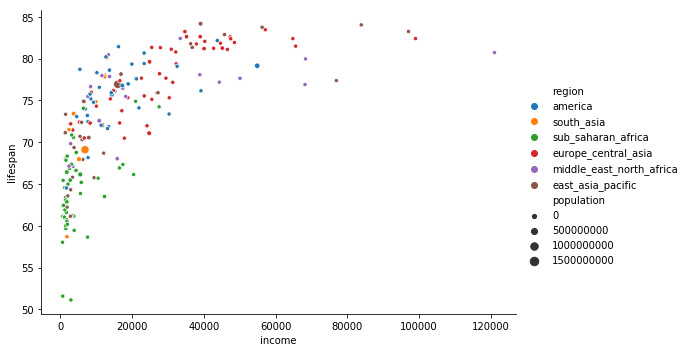

In [39]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now, height = 5, aspect = 1.5);

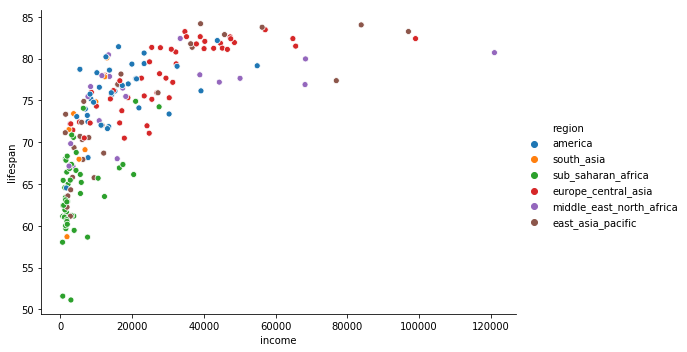

In [40]:
sns.relplot(x='income', y='lifespan', hue='region', sizes='population', data=now, height = 5, aspect = 1.5); # Size versus Sizes (all the same apparently)

In [0]:
# sizes = [25,50,75,100]

# sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes = sizes, data=now, height = 5, aspect = 1.5); # Size versus Sizes (all the same apparently)

## Analyzing Outliers

In [48]:
now[now.income > 80000] # Countries with per capita income > 80000

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [49]:
entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
qatar = now[now.country=='Qatar'] # Qatar 2018 = one line
qatar_income = qatar.income.values[0] # How to access the data from the one line observation
qatar_lifespan = qatar.lifespan.values[0]

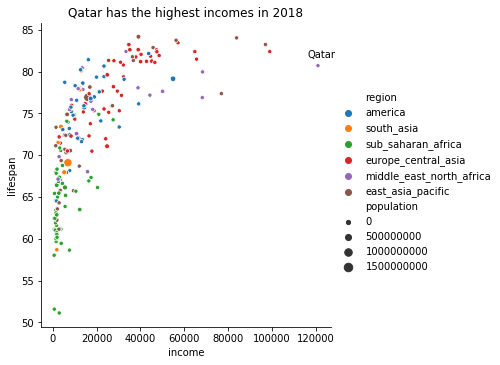

In [51]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

## Plot multiple years

In [0]:
# now = df[df.year==2018]

years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)] # Adds to centuries if the year in df matches the year in the dataset

In [0]:
df.year.isin?

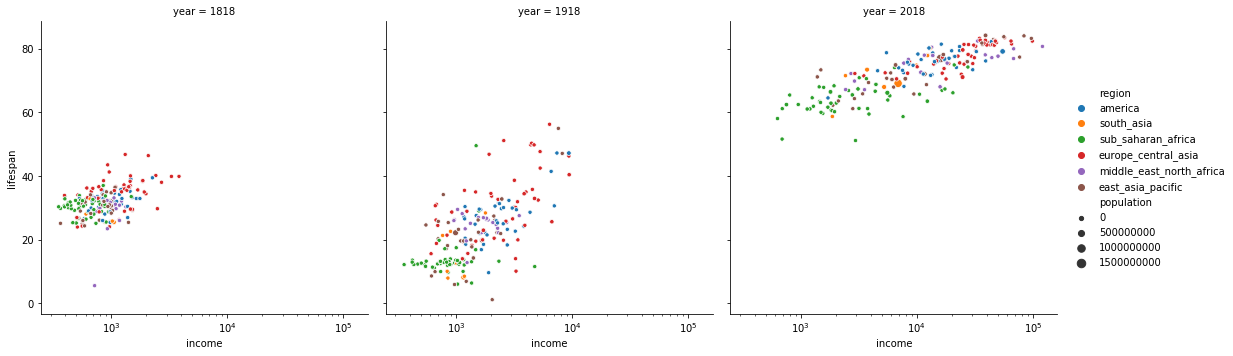

In [60]:
# Shows graphs side by side to show changes, col = year

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries);

plt.xscale('log');

## Consistent Countries per year?


In [61]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [62]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

## Point out a story

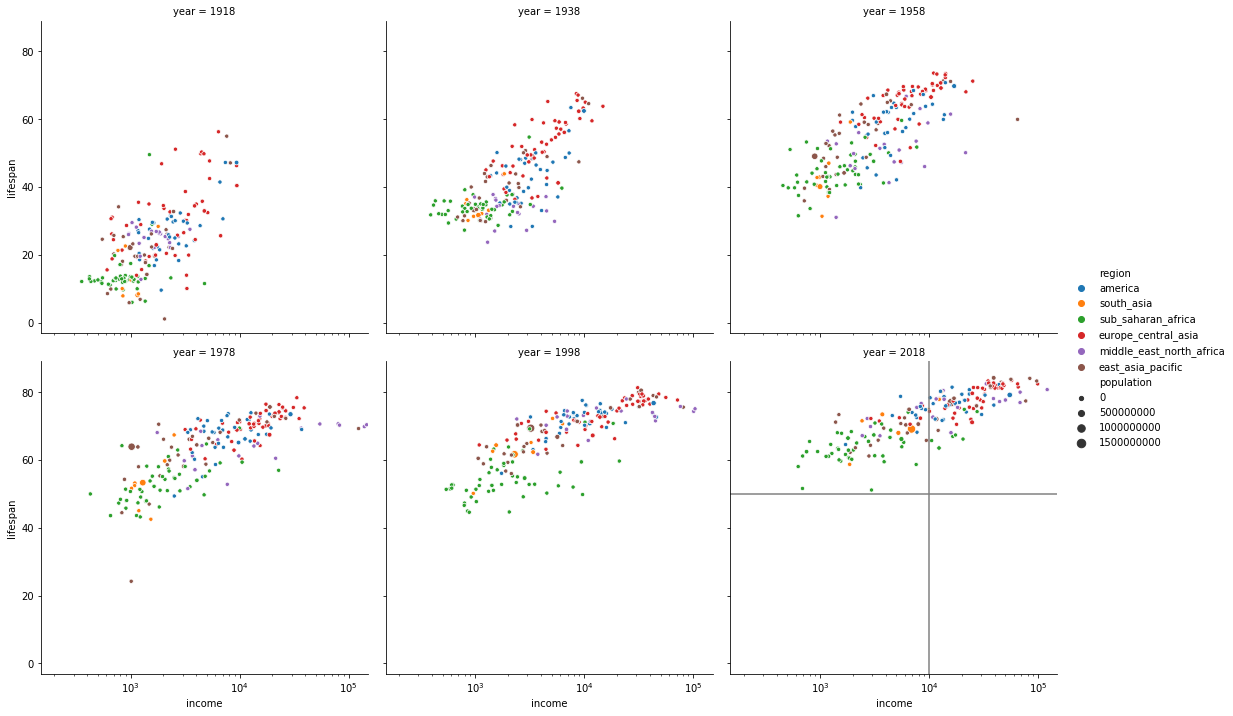

In [80]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', col_wrap = 3, data=subset)

plt.xscale('log')
plt.xlim((150, 150000));
plt.axhline(y=50, color='grey'); # Horizontal Line
plt.axvline(x=10000, color='grey'); # Vertical Line, odd that it only works for the last one

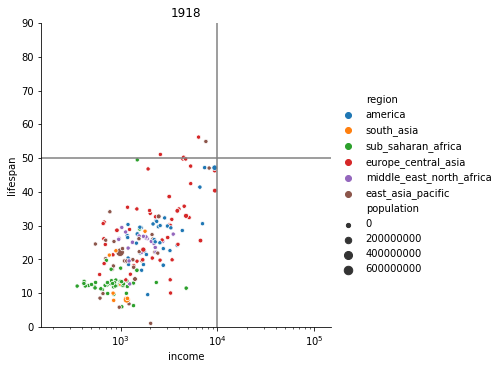

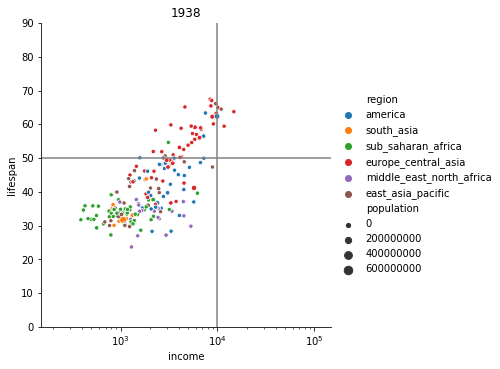

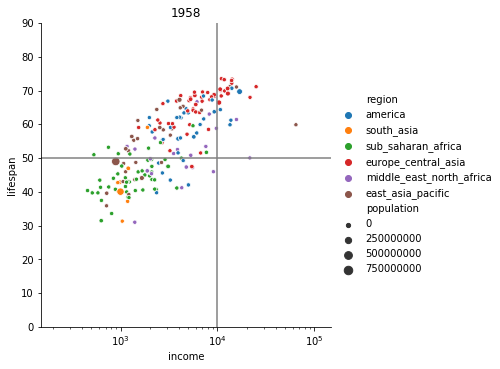

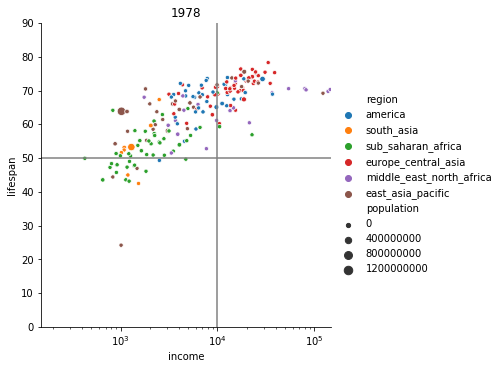

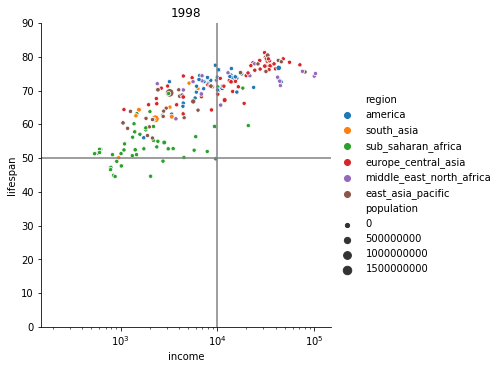

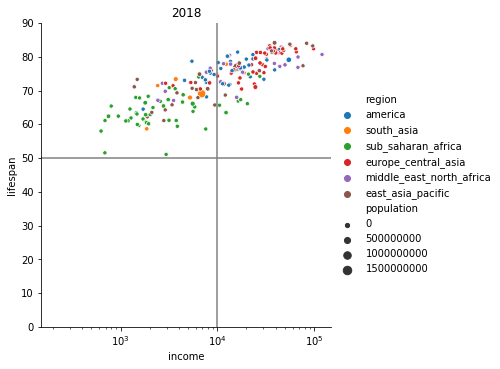

In [67]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey'); # Horizontal Line
  plt.axvline(x=10000, color='grey'); # Vertical Line
  
  #Plotting using a for loop

In [68]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


In [69]:
df[(df.year==2018) & (df.lifespan < 55)]

,year,income,lifespan,population,country,region
6444,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
22472,2018,2960,51.12,2263010,Lesotho,sub_saharan_africa


## Get interactive with Google Colab - Dynamic Code

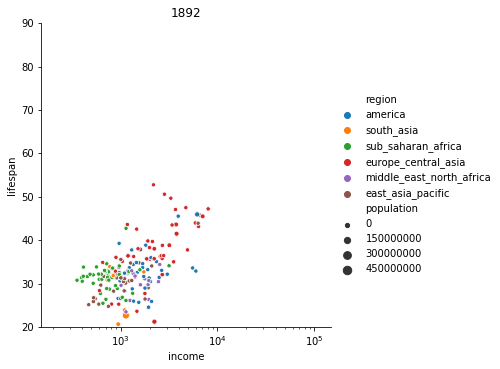

In [71]:
#@title Default title text
year = 1892 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

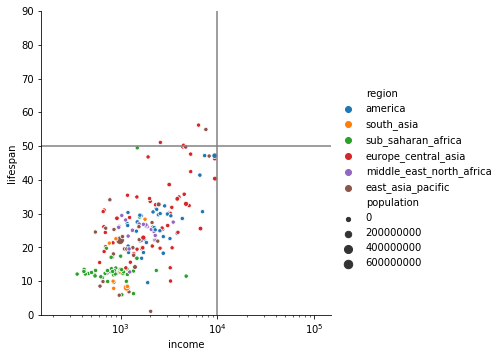

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

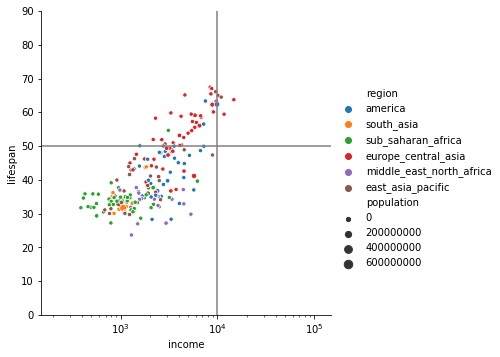

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

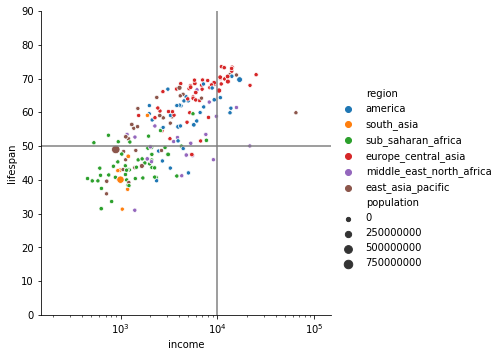

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

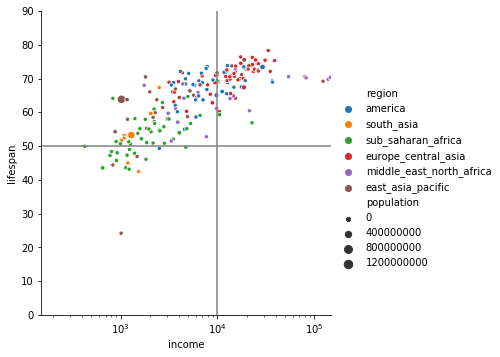

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

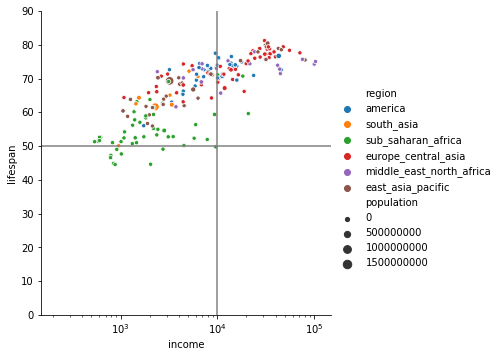

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

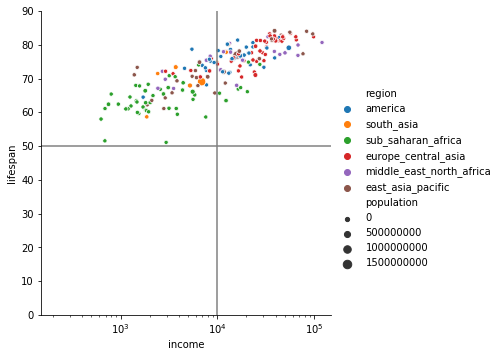

<IPython.core.display.Javascript object>

In [75]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90));
  plt.axhline(y=50, color='grey'); # Horizontal Line
  plt.axvline(x=10000, color='grey'); # Vertical Line

## Stretch goals

ipywidgets https://github.com/jupyter-widgets/ipywidgets

Matplotlib animation https://matplotlib.org/examples/animation/index.html

Connected scatter plots http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html

Idyll markup language for "scrollytelling" https://idyll-lang.org/

Altair https://altair-viz.github.io/


## ANIMATION 

In [0]:
import matplotlib.animation as animation